In [9]:
import torch
import torch.nn as nn

#Standard model class
class LinearModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
model = LinearModel(1, 1)

In [10]:
learnRate = 0.01
optimiser =  torch.optim.SGD(model.parameters(), lr =learnRate)
criterion = nn.MSELoss()

In [11]:
x_train=torch.tensor([i for i in range(10)], dtype = torch.float).reshape(-1,1)
#x_train = torch.randn(10).reshape(-1,1)
#x_train = torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float).reshape(-1,1)
y_train = torch.tensor([3*x*+5 for x in x_train]).reshape(-1,1) 

In [12]:
out = model(x_train) 
print(out)

tensor([[ 0.4756],
        [-0.0545],
        [-0.5846],
        [-1.1147],
        [-1.6448],
        [-2.1749],
        [-2.7049],
        [-3.2350],
        [-3.7651],
        [-4.2952]])


In [13]:
import torch
import torch.nn as nn
x = torch.ones(2,3, dtype=torch.float)
lin=nn.Linear(3, 2)
print(lin(x))
print(lin.bias)
print(lin.weight)

tensor([[ 0.6768, -0.4114],
        [ 0.6768, -0.4114]])
Parameter containing:
tensor([-0.2489,  0.3994])
Parameter containing:
tensor([[ 0.1746,  0.5742,  0.1770],
        [-0.4670, -0.1187, -0.2250]])


In [14]:
epochs = 1000 
for epoch in range(epochs):
    inputs = x_train
    labels = y_train
    out = model(inputs)    
    optimiser.zero_grad()    
    loss = criterion(out, labels)    
    loss.backward()    
    optimiser.step()
    predicted = model.forward(x_train)    
    print('epoch{}, loss {}'.format(epoch, loss.item()))
    

epoch0, loss 6807.48583984375
epoch1, loss 1178.037841796875
epoch2, loss 205.45703125
epoch3, loss 37.40979766845703
epoch4, loss 8.355867385864258
epoch5, loss 3.315117359161377
epoch6, loss 2.423192262649536
epoch7, loss 2.2482521533966064
epoch8, loss 2.1974263191223145
epoch9, loss 2.1682708263397217
epoch10, loss 2.1430888175964355
epoch11, loss 2.11881685256958
epoch12, loss 2.0949337482452393
epoch13, loss 2.071337938308716
epoch14, loss 2.048006057739258
epoch15, loss 2.0249409675598145
epoch16, loss 2.0021347999572754
epoch17, loss 1.9795833826065063
epoch18, loss 1.9572880268096924
epoch19, loss 1.9352413415908813
epoch20, loss 1.9134477376937866
epoch21, loss 1.8918975591659546
epoch22, loss 1.8705898523330688
epoch23, loss 1.8495222330093384
epoch24, loss 1.828691840171814
epoch25, loss 1.8080971240997314
epoch26, loss 1.7877315282821655
epoch27, loss 1.7675966024398804
epoch28, loss 1.7476907968521118
epoch29, loss 1.7280069589614868
epoch30, loss 1.7085431814193726
epoch

epoch354, loss 0.043535977602005005
epoch355, loss 0.04304575175046921
epoch356, loss 0.042561449110507965
epoch357, loss 0.042081937193870544
epoch358, loss 0.0416080541908741
epoch359, loss 0.04113950580358505
epoch360, loss 0.0406755767762661
epoch361, loss 0.04021746292710304
epoch362, loss 0.03976476937532425
epoch363, loss 0.03931685537099838
epoch364, loss 0.03887444734573364
epoch365, loss 0.03843638673424721
epoch366, loss 0.038003306835889816
epoch367, loss 0.037575192749500275
epoch368, loss 0.03715246543288231
epoch369, loss 0.03673390671610832
epoch370, loss 0.03631993383169174
epoch371, loss 0.0359109602868557
epoch372, loss 0.03550652787089348
epoch373, loss 0.03510676696896553
epoch374, loss 0.03471148759126663
epoch375, loss 0.034320391714572906
epoch376, loss 0.033933576196432114
epoch377, loss 0.033551476895809174
epoch378, loss 0.03317379951477051
epoch379, loss 0.03280008211731911
epoch380, loss 0.03243062645196915
epoch381, loss 0.0320655032992363
epoch382, loss 0

epoch746, loss 0.0005135274259373546
epoch747, loss 0.0005078008398413658
epoch748, loss 0.0005020627286285162
epoch749, loss 0.0004963591927662492
epoch750, loss 0.000490815204102546
epoch751, loss 0.00048528407933190465
epoch752, loss 0.00047979067312553525
epoch753, loss 0.0004744085599668324
epoch754, loss 0.0004690508358180523
epoch755, loss 0.00046374864177778363
epoch756, loss 0.0004585309943649918
epoch757, loss 0.00045337239862419665
epoch758, loss 0.00044826706289313734
epoch759, loss 0.00044321484165266156
epoch760, loss 0.0004382224869914353
epoch761, loss 0.00043332792120054364
epoch762, loss 0.00042842357652261853
epoch763, loss 0.00042359111830592155
epoch764, loss 0.00041882190271280706
epoch765, loss 0.0004141363315284252
epoch766, loss 0.00040947383968159556
epoch767, loss 0.00040478803566657007
epoch768, loss 0.000400287943193689
epoch769, loss 0.0003957495209760964
epoch770, loss 0.00039132367237471044
epoch771, loss 0.0003869089123327285
epoch772, loss 0.0003825522

In [15]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[ 14.9984]])), ('linear.bias', tensor(1.00000e-03 *
       [ 9.9932]))])


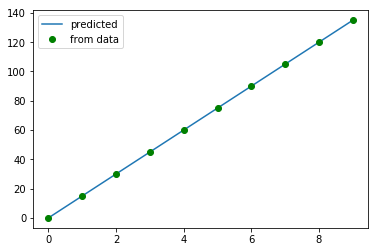

In [16]:
import matplotlib.pyplot as plt
x = x_train.detach().numpy() 
plt.plot(x, predicted.detach().numpy(), label = 'predicted')
plt.plot(x, y_train.detach().numpy(),'go', label = 'from data')
plt.legend()
plt.show()

In [17]:
torch.save(model.state_dict(), 'testmodel.pkl')

In [18]:
model = LinearModel(1,1)
model.load_state_dict(torch.load('testmodel.pkl'))

In [19]:
predicted

tensor([[ 9.9932e-03],
        [ 1.5008e+01],
        [ 3.0007e+01],
        [ 4.5005e+01],
        [ 6.0004e+01],
        [ 7.5002e+01],
        [ 9.0000e+01],
        [ 1.0500e+02],
        [ 1.2000e+02],
        [ 1.3500e+02]])